# 4. Definición, entrenamiento, evalución e inferencia.

## 4.1 Separación y normalización.

In [ ]:
import pandas as pd
import numpy as np

Extraemos los datos de los archivos para obtener los dataframe de entrenamiento, prueba y validación.

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/Copia de train_data.csv')
data_val = pd.read_csv('/content/drive/MyDrive/Copia de validation_data.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Copia de test_data.csv')

print('dimensiones de data_train : ', data_train.shape)
print('dimensiones de data_val :', data_val.shape)
print('dimensiones de data_test : ', data_test.shape)

dimensiones de data_train :  (765839, 75)
dimensiones de data_val : (173082, 75)
dimensiones de data_test :  (52211, 75)


In [ ]:
data_train.head()

,Unnamed: 0,building_id,square_feet(t-6),air_temperature(t-6),dew_temperature(t-6),sea_level_pressure(t-6),wind_direction(t-6),wind_speed(t-6),pressure_meter(t-6),month(t-6),day(t-6),weekday(t-6),hour(t-6),square_feet(t-5),air_temperature(t-5),dew_temperature(t-5),sea_level_pressure(t-5),wind_direction(t-5),wind_speed(t-5),pressure_meter(t-5),month(t-5),day(t-5),weekday(t-5),hour(t-5),square_feet(t-4),air_temperature(t-4),dew_temperature(t-4),sea_level_pressure(t-4),wind_direction(t-4),wind_speed(t-4),pressure_meter(t-4),month(t-4),day(t-4),weekday(t-4),hour(t-4),square_feet(t-3),air_temperature(t-3),dew_temperature(t-3),sea_level_pressure(t-3),wind_direction(t-3),wind_speed(t-3),pressure_meter(t-3),month(t-3),day(t-3),weekday(t-3),hour(t-3),square_feet(t-2),air_temperature(t-2),dew_temperature(t-2),sea_level_pressure(t-2),wind_direction(t-2),wind_speed(t-2),pressure_meter(t-2),month(t-2),day(t-2),weekday(t-2),hour(t-2),square_feet(t-1),air_temperature(t-1),dew_temperature(t-1),sea_level_pressure(t-1),wind_direction(t-1),wind_speed(t-1),pressure_meter(t-1),month(t-1),day(t-1),weekday(t-1),hour(t-1),electricity(t-6),electricity(t-5),electricity(t-4),electricity(t-3),electricity(t-2),electricity(t-1),electricity(t)
0,0,127,27071.0,3.8,2.4,1020.9,5.0,3.1,1.0,1.0,1.0,4.0,0.0,27071.0,3.7,2.4,1021.6,5.0,2.6,1.0,1.0,1.0,5.0,1.0,27071.0,2.6,1.9,1021.9,0.0,0.0,1.0,1.0,1.0,6.0,2.0,27071.0,2.0,1.2,1022.3,4.0,1.5,1.0,1.0,1.0,7.0,3.0,27071.0,2.3,1.8,1022.7,2.0,1.5,1.0,1.0,1.0,1.0,4.0,27071.0,2.4,2.0,1023.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,8.6786,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571
1,1,127,27071.0,3.7,2.4,1021.6,5.0,2.6,1.0,1.0,1.0,5.0,1.0,27071.0,2.6,1.9,1021.9,0.0,0.0,1.0,1.0,1.0,6.0,2.0,27071.0,2.0,1.2,1022.3,4.0,1.5,1.0,1.0,1.0,7.0,3.0,27071.0,2.3,1.8,1022.7,2.0,1.5,1.0,1.0,1.0,1.0,4.0,27071.0,2.4,2.0,1023.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,27071.0,2.3,1.8,1023.0,2.0,1.5,1.0,1.0,1.0,3.0,6.0,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571
2,2,127,27071.0,2.6,1.9,1021.9,0.0,0.0,1.0,1.0,1.0,6.0,2.0,27071.0,2.0,1.2,1022.3,4.0,1.5,1.0,1.0,1.0,7.0,3.0,27071.0,2.3,1.8,1022.7,2.0,1.5,1.0,1.0,1.0,1.0,4.0,27071.0,2.4,2.0,1023.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,27071.0,2.3,1.8,1023.0,2.0,1.5,1.0,1.0,1.0,3.0,6.0,27071.0,2.6,1.9,1022.5,2.0,1.0,1.0,1.0,1.0,4.0,7.0,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571
3,3,127,27071.0,2.0,1.2,1022.3,4.0,1.5,1.0,1.0,1.0,7.0,3.0,27071.0,2.3,1.8,1022.7,2.0,1.5,1.0,1.0,1.0,1.0,4.0,27071.0,2.4,2.0,1023.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,27071.0,2.3,1.8,1023.0,2.0,1.5,1.0,1.0,1.0,3.0,6.0,27071.0,2.6,1.9,1022.5,2.0,1.0,1.0,1.0,1.0,4.0,7.0,27071.0,2.2,1.5,1022.3,1.0,1.0,1.0,1.0,1.0,5.0,8.0,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571
4,4,127,27071.0,2.3,1.8,1022.7,2.0,1.5,1.0,1.0,1.0,1.0,4.0,27071.0,2.4,2.0,1023.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,27071.0,2.3,1.8,1023.0,2.0,1.5,1.0,1.0,1.0,3.0,6.0,27071.0,2.6,1.9,1022.5,2.0,1.0,1.0,1.0,1.0,4.0,7.0,27071.0,2.2,1.5,1022.3,1.0,1.0,1.0,1.0,1.0,5.0,8.0,27071.0,2.2,1.2,1022.0,2.0,2.6,1.0,1.0,1.0,6.0,9.0,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571


Procedemos a eliminar las columnas innecesarias, es decir, las columnas "Unnamed: 0" y "building_id"

In [ ]:
data_train2 = data_train.drop(["building_id"], axis=1)
data_val2 = data_val.drop(["building_id"], axis=1)
data_test2 = data_test.drop(["building_id"], axis=1)

In [ ]:
data_train3 = data_train2.drop(["Unnamed: 0"], axis=1)
data_val3 = data_val2.drop(["Unnamed: 0"], axis=1)
data_test3 = data_test2.drop(["Unnamed: 0"], axis=1)

In [ ]:
data_train3.head()

,square_feet(t-6),air_temperature(t-6),dew_temperature(t-6),sea_level_pressure(t-6),wind_direction(t-6),wind_speed(t-6),pressure_meter(t-6),month(t-6),day(t-6),weekday(t-6),hour(t-6),square_feet(t-5),air_temperature(t-5),dew_temperature(t-5),sea_level_pressure(t-5),wind_direction(t-5),wind_speed(t-5),pressure_meter(t-5),month(t-5),day(t-5),weekday(t-5),hour(t-5),square_feet(t-4),air_temperature(t-4),dew_temperature(t-4),sea_level_pressure(t-4),wind_direction(t-4),wind_speed(t-4),pressure_meter(t-4),month(t-4),day(t-4),weekday(t-4),hour(t-4),square_feet(t-3),air_temperature(t-3),dew_temperature(t-3),sea_level_pressure(t-3),wind_direction(t-3),wind_speed(t-3),pressure_meter(t-3),month(t-3),day(t-3),weekday(t-3),hour(t-3),square_feet(t-2),air_temperature(t-2),dew_temperature(t-2),sea_level_pressure(t-2),wind_direction(t-2),wind_speed(t-2),pressure_meter(t-2),month(t-2),day(t-2),weekday(t-2),hour(t-2),square_feet(t-1),air_temperature(t-1),dew_temperature(t-1),sea_level_pressure(t-1),wind_direction(t-1),wind_speed(t-1),pressure_meter(t-1),month(t-1),day(t-1),weekday(t-1),hour(t-1),electricity(t-6),electricity(t-5),electricity(t-4),electricity(t-3),electricity(t-2),electricity(t-1),electricity(t)
0,27071.0,3.8,2.4,1020.9,5.0,3.1,1.0,1.0,1.0,4.0,0.0,27071.0,3.7,2.4,1021.6,5.0,2.6,1.0,1.0,1.0,5.0,1.0,27071.0,2.6,1.9,1021.9,0.0,0.0,1.0,1.0,1.0,6.0,2.0,27071.0,2.0,1.2,1022.3,4.0,1.5,1.0,1.0,1.0,7.0,3.0,27071.0,2.3,1.8,1022.7,2.0,1.5,1.0,1.0,1.0,1.0,4.0,27071.0,2.4,2.0,1023.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,8.6786,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571
1,27071.0,3.7,2.4,1021.6,5.0,2.6,1.0,1.0,1.0,5.0,1.0,27071.0,2.6,1.9,1021.9,0.0,0.0,1.0,1.0,1.0,6.0,2.0,27071.0,2.0,1.2,1022.3,4.0,1.5,1.0,1.0,1.0,7.0,3.0,27071.0,2.3,1.8,1022.7,2.0,1.5,1.0,1.0,1.0,1.0,4.0,27071.0,2.4,2.0,1023.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,27071.0,2.3,1.8,1023.0,2.0,1.5,1.0,1.0,1.0,3.0,6.0,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571
2,27071.0,2.6,1.9,1021.9,0.0,0.0,1.0,1.0,1.0,6.0,2.0,27071.0,2.0,1.2,1022.3,4.0,1.5,1.0,1.0,1.0,7.0,3.0,27071.0,2.3,1.8,1022.7,2.0,1.5,1.0,1.0,1.0,1.0,4.0,27071.0,2.4,2.0,1023.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,27071.0,2.3,1.8,1023.0,2.0,1.5,1.0,1.0,1.0,3.0,6.0,27071.0,2.6,1.9,1022.5,2.0,1.0,1.0,1.0,1.0,4.0,7.0,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571
3,27071.0,2.0,1.2,1022.3,4.0,1.5,1.0,1.0,1.0,7.0,3.0,27071.0,2.3,1.8,1022.7,2.0,1.5,1.0,1.0,1.0,1.0,4.0,27071.0,2.4,2.0,1023.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,27071.0,2.3,1.8,1023.0,2.0,1.5,1.0,1.0,1.0,3.0,6.0,27071.0,2.6,1.9,1022.5,2.0,1.0,1.0,1.0,1.0,4.0,7.0,27071.0,2.2,1.5,1022.3,1.0,1.0,1.0,1.0,1.0,5.0,8.0,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571
4,27071.0,2.3,1.8,1022.7,2.0,1.5,1.0,1.0,1.0,1.0,4.0,27071.0,2.4,2.0,1023.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,27071.0,2.3,1.8,1023.0,2.0,1.5,1.0,1.0,1.0,3.0,6.0,27071.0,2.6,1.9,1022.5,2.0,1.0,1.0,1.0,1.0,4.0,7.0,27071.0,2.2,1.5,1022.3,1.0,1.0,1.0,1.0,1.0,5.0,8.0,27071.0,2.2,1.2,1022.0,2.0,2.6,1.0,1.0,1.0,6.0,9.0,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571,17.3571


Solo queda separar las variables de entrada de las de salida para poder comenzar con el entrenamiento.

In [ ]:
train_x_N = data_train3.values[:, :-1]
train_y_N = data_train3.values[:, -1:]

val_x_N = data_val3.values[:, :-1]
val_y_N = data_val3.values[:, -1:]

test_x_N= data_test3.values[:, :-1]
test_y_N= data_test3.values[:, -1:]

print('Dimensiones de train_x :', train_x_N.shape)
print('Dimensiones de train_y :', train_y_N.shape)
print('Dimensiones de val_x :', val_x_N.shape)
print('Dimensiones de val_y :', val_y_N.shape)
print('Dimensiones de test_x :', test_x_N.shape)
print('Dimensiones de test_y :', test_y_N.shape)

Dimensiones de train_x : (765839, 72)
Dimensiones de train_y : (765839, 1)
Dimensiones de val_x : (173082, 72)
Dimensiones de val_y : (173082, 1)
Dimensiones de test_x : (52211, 72)
Dimensiones de test_y : (52211, 1)


Procedemos a normalizar los datos utilizando las funciones MinMaxScaler y StandardScaler de la librería "skylearn".

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# load data
data_train_x_values = train_x_N
data_val_x_values = val_x_N
data_test_x_values = test_x_N
data_train_y_values = train_y_N
data_val_y_values = val_y_N
data_test_y_values = test_y_N
# check data is float
data_train_x_values = data_train_x_values.astype('float32')
data_val_x_values = data_val_x_values.astype('float32')
data_test_x_values = data_test_x_values.astype('float32')
data_train_y_values = data_train_y_values.astype('float32')
data_val_y_values = data_val_y_values.astype('float32')
data_test_y_values = data_test_y_values.astype('float32')
# normalizing

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = StandardScaler()

train_x = scaler_x.fit_transform(data_train_x_values)
val_x = scaler_x.transform(data_val_x_values)
test_x = scaler_x.transform(data_test_x_values)

train_y = scaler_y.fit_transform(data_train_y_values)
val_y = scaler_y.transform(data_val_y_values)
test_y = scaler_y.transform(data_test_y_values)

Redimensionamos los vectores de entrada.

In [ ]:
n_hours = 6
n_features = 12
train_x = train_x.reshape((train_x.shape[0], (n_hours), n_features))
test_x = test_x.reshape((test_x.shape[0], (n_hours), n_features))
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(765839, 6, 12) (765839, 1) (52211, 6, 12) (52211, 1)


## 4.2 Definición del modelo, entrenamiento y evaluación.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dense
from matplotlib import pyplot

In [ ]:
# define model
model_1 = Sequential()
#model_1.add(Bidirectional(LSTM(200, activation='relu', return_sequences = True), input_shape=(train_x.shape[1], train_x.shape[2])))
model_1.add(LSTM(100, activation='relu', input_shape=(train_x.shape[1], train_x.shape[2])))
model_1.add(Dense(20))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')


# fit model
history = model_1.fit(train_x, train_y, epochs=150, batch_size=72, validation_data=(test_x, test_y), verbose=1, shuffle=False)


# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/150
10637/10637 [==============================] - 114s 11ms/step - loss: 0.2227 - val_loss: 0.6058
Epoch 2/150
10637/10637 [==============================] - 112s 11ms/step - loss: 0.2265 - val_loss: 0.5353
Epoch 3/150
10637/10637 [==============================] - 114s 11ms/step - loss: 0.1586 - val_loss: 0.4450
Epoch 4/150
10637/10637 [==============================] - 110s 10ms/step - loss: 0.1459 - val_loss: 0.4181
Epoch 5/150
10637/10637 [==============================] - 112s 10ms/step - loss: 0.1436 - val_loss: 0.4040
Epoch 6/150
10637/10637 [==============================] - 113s 11ms/step - loss: 0.1394 - val_loss: 0.3937
Epoch 7/150
 8607/10637 [=======================>......] - ETA: 20s - loss: 0.1263

## 4.3 Inferencia.

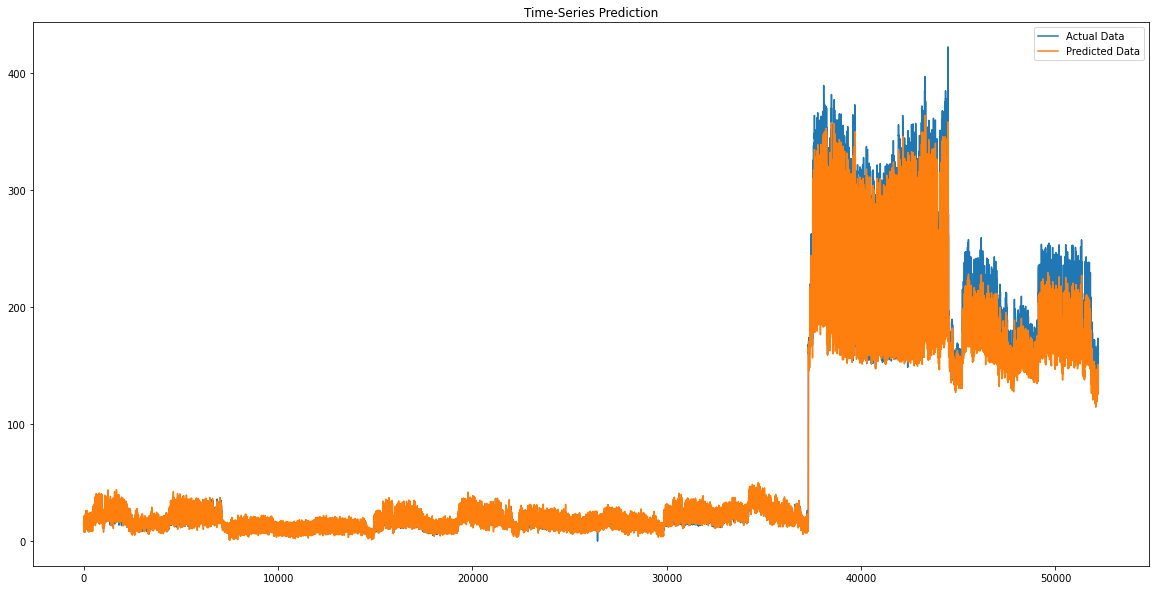

Test RMSE: 13.778


In [38]:
from matplotlib import pyplot as plt

y_predict = model_1.predict(test_x)#forward pass y_predict = model.predict(test_X)
y_actual = test_y #actual data

y_predict = scaler_y.inverse_transform(y_predict) #reverse transformation
y_actual = scaler_y.inverse_transform(y_actual)

plt.figure(figsize=(20,10)) #plotting
#plt.axvline(x=train_hours, c='r', linestyle='--') #size of the training set

plt.plot(y_actual, label='Actual Data') #actual plot
plt.plot(y_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

rmse = np.sqrt(mean_squared_error(y_actual, y_predict ))
print('Test RMSE: %.3f' % rmse)

In [26]:
!pip install chart_studio

     |████████████████████████████████| 71kB 3.4MB/s 


In [27]:
import chart_studio.plotly as py
import plotly.graph_objs as go
# Offline mode
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected='true')

In [40]:
y_predict = y_predict.flatten()
y_actual = y_actual.flatten()

In [41]:
Predicted = go.Scatter(x=np.arange(len(y_predict)), y=y_predict, opacity = 1, name = 'Valor Estimado', line=dict(color='royalblue'), yaxis='y')
Actual = go.Scatter(x=np.arange(len(y_actual)), y=y_actual, opacity = 0.7, name = 'Valor Actual', line=dict(color='lightblue'), yaxis='y')

layout = go.Layout(title='Electricity Forecasting', xaxis=dict(title='Hour'),
                   yaxis=dict(title='kBTU', overlaying='y'),
                  yaxis2=dict(title='kBTU', side='right'))
fig = go.Figure(data=[Predicted, Actual], layout=layout)
fig.show(renderer="colab")

## 4.4 Comentarios.

Las gráficas corresponden a los patrones de consumo de 7 edificios diferentes. Aparentemente la red neuronal logra ajustar el comportamiento general de las fluctuaciones diarias, capturando de cierta forma los ciclos diurnos y nocturnos, así como los ciclos estacionales. Se aprecia que en ocasiones la red subestima los valores máximos y esto es algo que se puede mejorar, ya sea ajsutando los hiperparámetros o aumentando la complejidad de la red, así como el número de épocas que se le da al entrenamiento.

## 4.5 Salvando modelo.

In [72]:
from tensorflow import keras
from tensorflow.keras import layers

# Guardar el Modelo
model_1.save('model_2.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
new_model = keras.models.load_model('model_2.h5')
model_1.predict(test_x)

array([[-0.5351646 ],
       [-0.5235188 ],
       [-0.5249951 ],
       ...,
       [ 0.35286593],
       [ 0.3484068 ],
       [ 0.3100047 ]], dtype=float32)

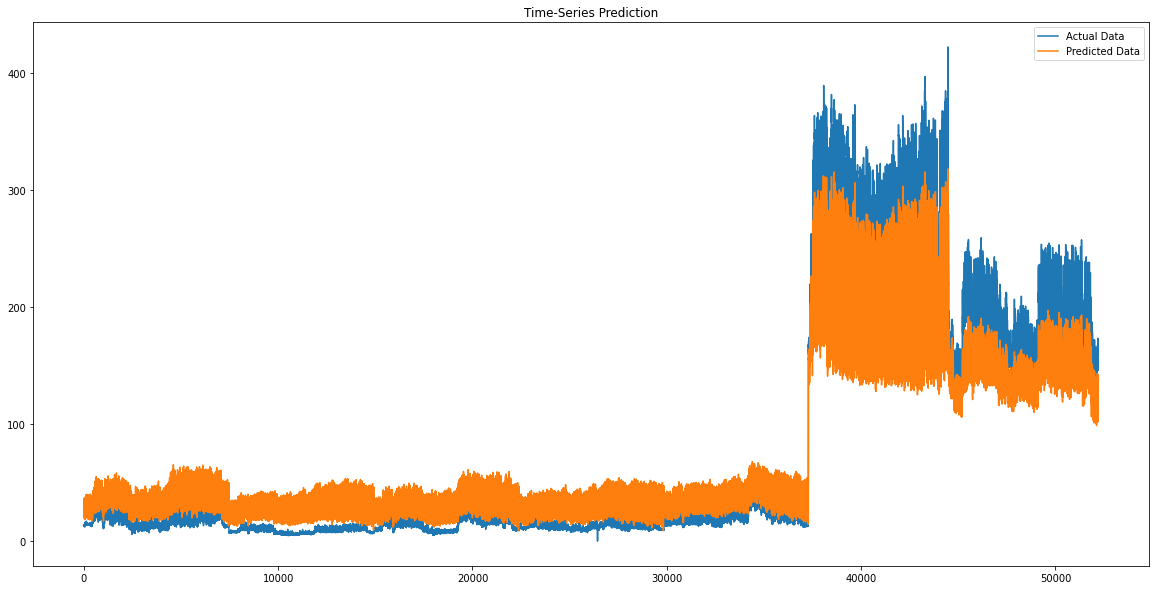

Test RMSE: 28.281


In [73]:
y_predict = new_model.predict(test_x)#forward pass y_predict = model.predict(test_X)
y_actual = test_y #actual data

y_predict = scaler_y.inverse_transform(y_predict) #reverse transformation
y_actual = scaler_y.inverse_transform(y_actual)

plt.figure(figsize=(20,10)) #plotting
#plt.axvline(x=train_hours, c='r', linestyle='--') #size of the training set

plt.plot(y_actual, label='Actual Data') #actual plot
plt.plot(y_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

rmse = np.sqrt(mean_squared_error(y_actual, y_predict ))
print('Test RMSE: %.3f' % rmse)

In [59]:
import numpy as np

# Verifique que el estado esté preservado
new_predictions = new_model.predict(test_x)
np.testing.assert_allclose(predictions, new_predictions, rtol=1e-6, atol=1e-6)

# Tenga en cuenta que el estado del optimizador también se conserva:
# puede reanudar el entrenamiento donde lo dejó.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
